In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
df = pd.read_csv('E:/dev/ml_course_rv/ml_course_homework/25.csv')

In [74]:
df.head()


,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66


In [75]:
df["mood"].value_counts()

mood
300    40
100    29
200    27
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             96 non-null     object
 1   step_count       96 non-null     int64 
 2   mood             96 non-null     int64 
 3   calories_burned  96 non-null     int64 
 4   hours_of_sleep   96 non-null     int64 
 5   bool_of_active   96 non-null     int64 
 6   weight_kg        96 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.4+ KB


In [76]:
df.describe()

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
count,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000
mean,2935.937500,211.458333,93.447917,5.21875,218.750000,64.281250
std,2143.384573,84.442184,71.601951,1.51625,249.341237,0.627495
min,25.000000,100.000000,0.000000,2.00000,0.000000,64.000000
25%,741.000000,100.000000,21.750000,4.00000,0.000000,64.000000
50%,2987.500000,200.000000,96.000000,5.00000,0.000000,64.000000
75%,4546.250000,300.000000,149.250000,6.00000,500.000000,64.000000
max,7422.000000,300.000000,243.000000,9.00000,500.000000,66.000000


In [77]:
df.drop(["date", "bool_of_active", "weight_kg"], inplace=True, axis=1)

In [78]:
df.head()

,step_count,mood,calories_burned,hours_of_sleep
0,5464,200,181,5
1,6041,100,197,8
2,25,100,0,5
3,5461,100,174,4
4,6915,200,223,5


In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()
scaler.fit(df.drop("mood", axis=1))

StandardScaler()

In [81]:
sk_features_scaled = scaler.transform(df.drop("mood",axis=1))

In [82]:
sk_features_scaled 

array([[ 1.18566369,  1.22917988, -0.14502776],
       [ 1.45627723,  1.45381049,  1.84392441],
       [-1.36523242, -1.31195392, -0.14502776],
       [ 1.18425669,  1.13090399, -0.80801182],
       [ 1.86618405,  1.81883524, -0.14502776],
       [ 0.75465183,  0.77991866,  0.5179563 ],
       [ 0.65850663,  0.65356394,  0.5179563 ],
       [-0.80008629, -0.77845622,  1.18094035],
       [-1.34834839, -1.29791451, -0.14502776],
       [-0.78695427, -0.75037739,  0.5179563 ],
       [ 0.09945751,  0.10602682,  1.84392441],
       [ 0.82124996,  0.8220369 , -0.14502776],
       [ 0.842355  ,  0.79395807,  0.5179563 ],
       [ 0.27345686,  0.27449978,  1.18094035],
       [-0.63593596, -0.62402267, -0.14502776],
       [-0.05343679, -0.10456438,  0.5179563 ],
       [-1.29206828, -1.22771744,  1.84392441],
       [ 0.10414752,  0.07794799, -0.14502776],
       [ 0.67867367,  0.69568218, -0.80801182],
       [ 0.4432352 ,  0.44297274, -0.14502776],
       [ 0.51639935,  0.49913039,  0.517

In [83]:
df["mood"] = df["mood"].replace({100:0, 200:1, 300:2})

In [84]:
df["mood"]


0     1
1     0
2     0
3     0
4     1
     ..
91    0
92    2
93    1
94    1
95    2
Name: mood, Length: 96, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X = df_features_scaled
y = df["mood"]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=11)

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
K = 1
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [90]:
pred = knn.predict(X_test)

In [91]:
pred

array([1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2,
       0, 0, 2, 1, 0, 2, 0], dtype=int64)

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[5 3 3]
 [3 3 0]
 [0 5 7]]
              precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.27      0.50      0.35         6
           2       0.70      0.58      0.64        12

    accuracy                           0.52        29
   macro avg       0.53      0.51      0.51        29
weighted avg       0.58      0.52      0.54        29



In [94]:
error_rate = []

limit = 50

for i in range(1,limit):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    error_rate.append(np.mean(pred_y != y_test))

Text(0, 0.5, 'Error rate values')

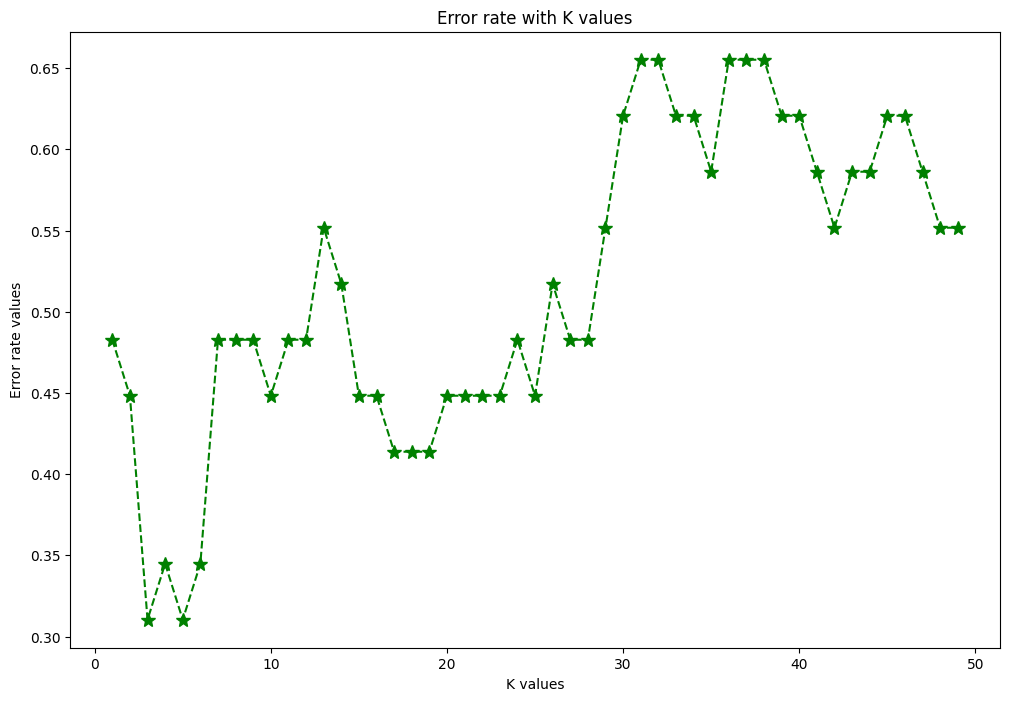

In [95]:
plt.figure(figsize=(12,8))
plt.plot(range(1,limit),error_rate, color="green", linestyle="--", marker="*", markersize=10)
plt.title("Error rate with K values")
plt.xlabel("K values")
plt.ylabel("Error rate values")

In [96]:
K = 6
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print("---------------")
print(classification_report(y_test, pred))

[[8 1 2]
 [2 2 2]
 [0 3 9]]
---------------
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.33      0.33      0.33         6
           2       0.69      0.75      0.72        12

    accuracy                           0.66        29
   macro avg       0.61      0.60      0.61        29
weighted avg       0.66      0.66      0.66        29



In [111]:
df = pd.read_csv('E:/dev/ml_course_rv/ml_course_homework/iphone_purchase_records.csv')

In [112]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [113]:
df["Purchase Iphone"].value_counts()

Purchase Iphone
0    257
1    143
Name: count, dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [115]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [116]:
scaler = StandardScaler()

In [119]:
df['Gender'] = df['Gender'].replace({"Male":1, "Female":0})

C:\Users\Kris\AppData\Local\Temp\ipykernel_2920\2060169480.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({"Male":1, "Female":0})


In [120]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [121]:
scaler.fit(df.drop("Purchase Iphone", axis=1))

StandardScaler()

In [132]:
sk_features_scaled = scaler.transform(df.drop("Purchase Iphone",axis=1))

In [133]:
df_features_scaled = pd.DataFrame(sk_features_scaled)

In [134]:
df_features_scaled

,0,1,2
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751
...,...,...,...
395,-0.980196,0.797057,-0.844019
396,1.020204,1.274623,-1.372587
397,-0.980196,1.179110,-1.460681
398,1.020204,-0.158074,-1.078938


In [135]:
X = df_features_scaled
y = df['Purchase Iphone']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=22)

In [137]:
K = 1
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [138]:
pred = knn.predict(X_test)

In [139]:
pred

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [140]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[67  8]
 [12 33]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        75
           1       0.80      0.73      0.77        45

    accuracy                           0.83       120
   macro avg       0.83      0.81      0.82       120
weighted avg       0.83      0.83      0.83       120



In [141]:
error_rate = []

limit = 50

for i in range(1,limit):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    error_rate.append(np.mean(pred_y != y_test))

Text(0, 0.5, 'Error rate values')

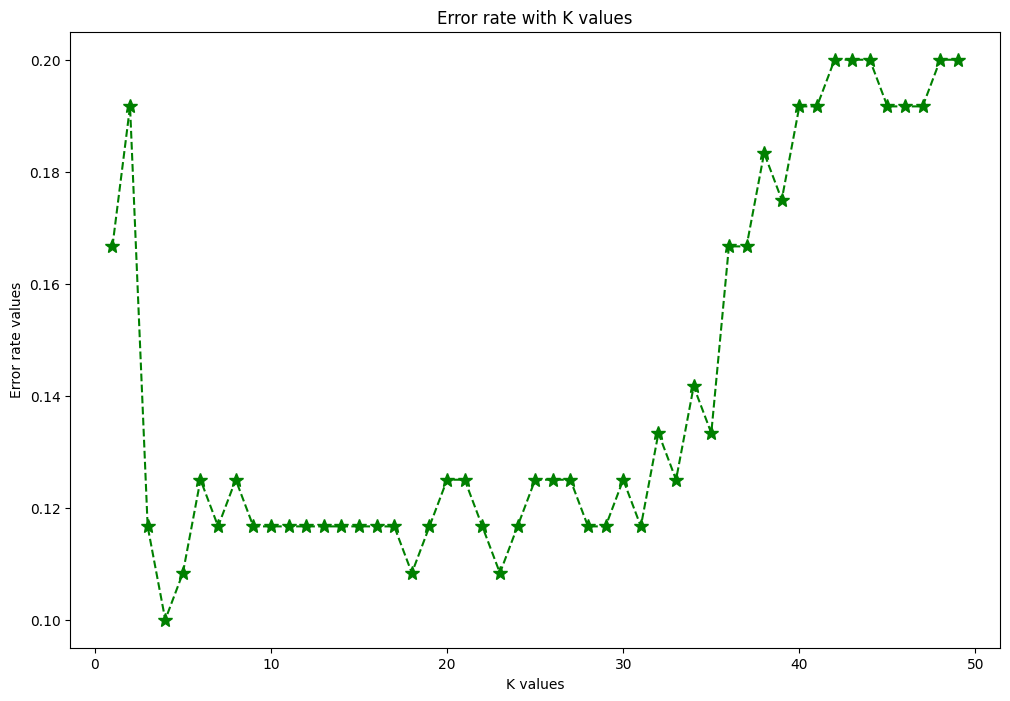

In [142]:
plt.figure(figsize=(12,8))
plt.plot(range(1,limit),error_rate, color="green", linestyle="--", marker="*", markersize=10)
plt.title("Error rate with K values")
plt.xlabel("K values")
plt.ylabel("Error rate values")

In [145]:
K = 5
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print("---------------")
print(classification_report(y_test, pred))

[[68  7]
 [ 6 39]]
---------------
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        75
           1       0.85      0.87      0.86        45

    accuracy                           0.89       120
   macro avg       0.88      0.89      0.88       120
weighted avg       0.89      0.89      0.89       120

